# Analytic_test

Файл с данными 'Analytic_test'. В нём в упорядоченном формате собраны данные о 4 компаниях: Red, Blue, Green, Black.

По компаниям представлены следующие данные:

* HID (human_id) - зашифрованный персональный индефикатор пользователя

* has_company_id - наличие зарегистрированного аккаунта в компании

* company_gmv_total - сумарный gmv пользователя в сервисе

* company_gvm_order_count - количество успешных заказов пользователя в сервисе

* company_activite_count - количество активных действий пользователя в сервисе

* company_android - установленное приложение пользователя приложение компании на платформе android

* company_apple - установленное приложение пользователя приложение компании на платформе apple

* company_web - установленное приложение пользователя приложение компании на платформе ПК

* is_msk - территориальное расположение в Москве

Задание: Какие выводы вы можете сделать на основании этих данных?




## Подключение библиотек

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Открытие файла и первичный осмотр

In [2]:
df = pd.read_excel('Analytic_test.xlsx', header=1)

df.head()

,Unnamed: 0,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим не нужную колонку

In [3]:
df = df.drop('Unnamed: 0', axis=1)

Выведем основную информацию о датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

In [5]:
df.describe()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_gmv_total,Green_gvm_total,Black_gvm_total,Red_android,Green_android,Black_android,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.55874,0.008900,0.010840,0.138010,2.461165,59.934200,94.873080,0.32133,0.00546,0.010770,0.080470,0.108740,0.006160,0.017820,0.04646,0.119210,0.671080,0.001980,0.014610,0.10640
std,0.49654,0.094344,0.104032,0.360645,126.674718,1230.671036,1699.422723,0.46699,0.07369,0.103219,0.272021,0.311314,0.078244,0.132297,0.21048,0.324037,0.469823,0.044453,0.119986,0.30835
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.00000,2.000000,2.000000,4.000000,32302.000000,94106.000000,188252.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


Прежде чем начать работать с данными нужно их почистить

## Обработка данных

Итак перейдем к обработке данных

Сразу видно несколько несостыковок

1) В столбце Blue_gmv_total есть один пропуск. Так как он всего один мы его удалим

2) Столбцы Blue_activity_count, Green_gvm_order_count, Black_gvm_order_count имеют тип object, хотя должны имееть тип float или int

Сначала сделаем шаг 1

In [6]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HID                    99999 non-null  object 
 1   active_Red             99999 non-null  float64
 2   has_Green_id           99999 non-null  float64
 3   has_Black_id           99999 non-null  float64
 4   has_Blue_id            99999 non-null  float64
 5   Blue_activity_count    99999 non-null  object 
 6   Blue_gmv_total         99999 non-null  float64
 7   Green_gvm_total        99999 non-null  float64
 8   Green_gvm_order_count  99999 non-null  object 
 9   Black_gvm_total        99999 non-null  float64
 10  Black_gvm_order_count  99999 non-null  object 
 11  Red_android            99999 non-null  float64
 12  Green_android          99999 non-null  float64
 13  Black_android          99999 non-null  float64
 14  Blue_android           99999 non-null  float64
 15  Re

Перейдём к 2 пункту посмотрим на уникальные значения в этих колонках

In [7]:
df['Blue_activity_count'].unique()

array(['2.0', '0.0', '1.0', '17.0', '13.0', '5.0', '6.0', '26.0', '8.0',
       '4.0', '27.0', '19.0', '12.0', '9.0', '3.0', '20.0', '10.0',
       '23.0', '7.0', '16.0', '14.0', '15.0', '53.0',
       datetime.datetime(2019, 5, 4, 0, 0), '32.0', '11.0', '18.0',
       '24.0', '119.0', '49.0', '39.0', '21.0',
       datetime.datetime(2019, 5, 7, 0, 0), '35.0', '72.0', '30.0',
       '71.0', '28.0', '42.0', '34.0', '41.0', '22.0', '29.0', '36.0',
       '90.0', '40.0', '43.0', datetime.datetime(2019, 5, 1, 0, 0),
       '51.0', '44.0', '25.0', '31.0', '45.0', '67.0', '33.0', '101.0',
       '74.0', '46.0', '111.0', '66.0', '38.0', '63.0', '100.0', '237.0',
       '59.0', datetime.datetime(2019, 5, 3, 0, 0),
       datetime.datetime(2019, 5, 6, 0, 0), '37.0', '47.0'], dtype=object)

Чтобы понять какие значения прячутся за datetime, нужно спрашивать коллег. У меня этой возможности нет, поэтому просто удаляем эти данные.

In [21]:
df['Green_gvm_order_count'].unique()

array(['0.0', '2.0', '26.0', '5.0', '37.0', '3.0', '12.0', '7.0', '1.0',
       '6.0', '8.0', datetime.datetime(2019, 5, 4, 0, 0), '4.0', '40.0',
       '9.0', '22.0', '14.0', '15.0', '85.0', '25.0', '10.0', '20.0',
       '18.0', '11.0', '31.0', '23.0', '39.0', '13.0', '42.0', '127.0',
       '28.0', '101.0', '32.0', '30.0', '27.0', '51.0', '83.0', '36.0',
       '16.0', '64.0', '19.0', '29.0', '24.0', '52.0', '82.0', '45.0',
       '50.0', '62.0', '49.0', '21.0', '56.0', '65.0', '100.0', '76.0',
       '88.0', '17.0', '69.0', '114.0', '35.0', '125.0', '38.0', '108.0',
       '168.0', '84.0', '63.0', '75.0', '34.0', '78.0', '43.0', '60.0',
       datetime.datetime(2019, 5, 2, 0, 0)], dtype=object)

In [22]:
df['Black_gvm_order_count'].unique()

array(['0.0', '1.0', '4.0', '2.0', '3.0', '5.0', '8.0', '25.0', '7.0',
       '27.0', '6.0', '15.0', '9.0', '10.0', '50.0', '22.0', '13.0',
       '12.0', '14.0', '16.0', '20.0', '26.0', '11.0', '18.0', '21.0',
       datetime.datetime(2019, 5, 2, 0, 0), '19.0', '37.0', '33.0',
       '17.0', '35.0', '29.0', '51.0', '23.0', '42.0', '60.0', '34.0',
       '36.0', datetime.datetime(2019, 5, 6, 0, 0)], dtype=object)

In [23]:
df['Blue_activity_count'] = pd.to_numeric(df['Blue_activity_count'], errors='coerce')
df['Green_gvm_order_count'] = pd.to_numeric(df['Green_gvm_order_count'], errors='coerce')
df['Black_gvm_order_count'] = pd.to_numeric(df['Black_gvm_order_count'], errors='coerce')

df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99986 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HID                    99986 non-null  object 
 1   active_Red             99986 non-null  float64
 2   has_Green_id           99986 non-null  float64
 3   has_Black_id           99986 non-null  float64
 4   has_Blue_id            99986 non-null  float64
 5   Blue_activity_count    99986 non-null  float64
 6   Blue_gmv_total         99986 non-null  float64
 7   Green_gvm_total        99986 non-null  float64
 8   Green_gvm_order_count  99986 non-null  float64
 9   Black_gvm_total        99986 non-null  float64
 10  Black_gvm_order_count  99986 non-null  float64
 11  Red_android            99986 non-null  float64
 12  Green_android          99986 non-null  float64
 13  Black_android          99986 non-null  float64
 14  Blue_android           99986 non-null  float64
 15  Re

Отлично теперь построим гистограммы для Blue_gmv_total и посмотрим нет ли у нас аномальных значений. Но для начала я повторно выведу метод describe для 'Blue_gmv_total', 'Black_gvm_total', 'Blue_gmv_total'.

In [113]:
df[['Blue_gmv_total', 'Black_gvm_total', 'Blue_gmv_total']].describe()

,Blue_gmv_total,Black_gvm_total,Blue_gmv_total
count,99986.000000,99986.000000,99986.000000
mean,2.461325,94.695457,2.461325
std,126.682942,1699.044593,126.682942
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,32302.000000,188252.000000,32302.000000


Так как у нас много нулевых значений построим гистограммы без них

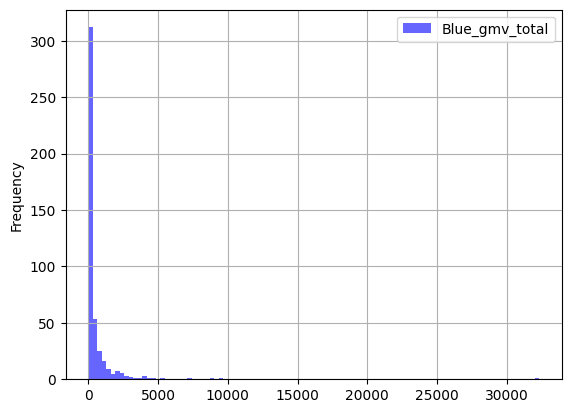

In [120]:
df[df['Blue_gmv_total'] > 0]['Blue_gmv_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Blue')
plt.legend();

Тут сложно что-то понять увеличим график

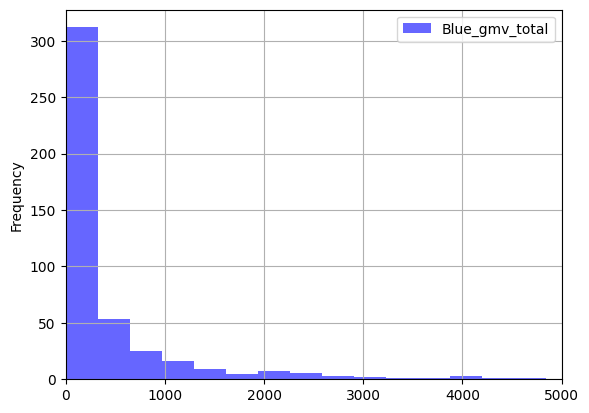

In [117]:
df[df['Blue_gmv_total'] > 0]['Blue_gmv_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Blue')
plt.xlim(0, 5000)
plt.legend();

Как мы видим многие пользователи делают мало заказов у компании.

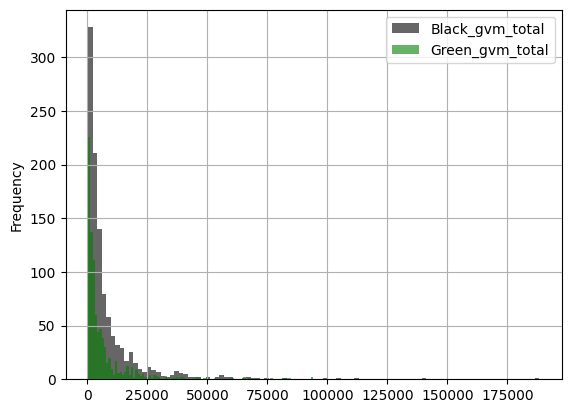

In [121]:
df[df['Black_gvm_total'] > 0]['Black_gvm_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Black')
df[df['Green_gvm_total'] > 0]['Green_gvm_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Green')
plt.legend();

На этом графике видно, что общий объём оборота товаров больше у компании Black. Возьмем поменьше интервал по gvm_total

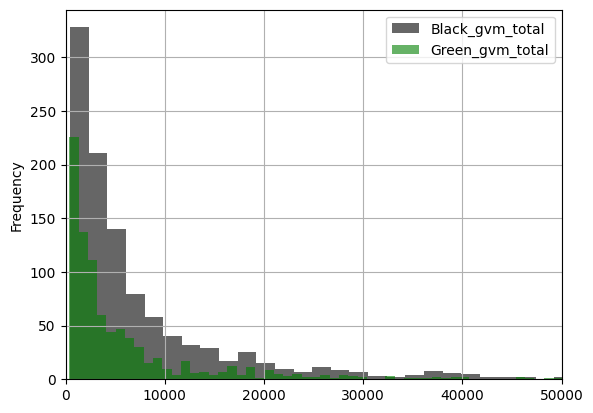

In [124]:
df[df['Black_gvm_total'] > 0]['Black_gvm_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Black')
df[df['Green_gvm_total'] > 0]['Green_gvm_total'].plot(kind='hist', bins=100, grid=True, alpha=0.6, color='Green')
plt.xlim(0, 50000)
plt.legend();


Немного забегая вперед, проанлизируем построенные мною графики. Видно, что общий объём оборота товаров у Black больше чем у Green. Можно было бы выделить все значения больше 50000 как аномальные. Но скорее всего - это люди, которые являются постоянными клиентами или, возможно, юр. лица (компании). Из-за этого я оставлю данные без изменения. По компании Red данных нет.

Проверим остальные колонки на уникальные значения

In [38]:
for i in df.columns:
    if i not in ['Blue_gmv_total', 'Green_gvm_total', 'Black_gvm_total']:
        print('---------------------------')
        print(i)
        print(df[i].unique())

---------------------------
HID
['00003c7fb5e57ce673f1801f3679f5c25' '00006b602533083e3bebfcbff08613931'
 '0000736c3f76339196cb1cc759b8363b' ...
 '325563dbbb35c393be38c5c79373ed180' '3255650825570bcc93bc9b076b0bfbb25e6'
 '325566ec18c0db59083f5f6bb1b5f93d5']
---------------------------
active_Red
[0. 1.]
---------------------------
has_Green_id
[0. 1. 2.]
---------------------------
has_Black_id
[0. 1. 2.]
---------------------------
has_Blue_id
[1. 0. 2. 3. 4.]
---------------------------
Blue_activity_count
[  2.   0.   1.  17.  13.   5.   6.  26.   8.   4.  27.  19.  12.   9.
   3.  20.  10.  23.   7.  16.  14.  15.  53.  32.  11.  18.  24. 119.
  49.  39.  21.  35.  72.  30.  71.  28.  42.  34.  41.  22.  29.  36.
  90.  40.  43.  51.  44.  25.  31.  45.  67.  33. 101.  74.  46. 111.
  66.  38.  63. 100. 237.  59.  37.  47.]
---------------------------
Green_gvm_order_count
[  0.   2.  26.   5.  37.   3.  12.   7.   1.   6.   8.   4.  40.   9.
  22.  14.  15.  85.  25.  10.  20.  18

Аномалий нет можно переходить к анализу

## Анализ данных

Для начала, я бы хотел посмотреть, сколько скачиваний у каждый компании на разных устройствах.  Для этого построим круговые диаграммы. Также для каждой компании, я бы покзал количество уникальных пользователей, а также пользователей которые зарегистрированы в одной компании

Заранее оговарюсь, что у нас нет данных о наличие зарегистрированного аккаунта в Red. Можно было бы скзать, что колонка active_Red - это и есть has_Red_id, но мы будем верить и думать, что данные выгрузили правильно и это не имеет отношение к has_Red_id.

### Компания Blue

Количество уникальных пользователей

In [97]:
people_Blue = df[df['has_Blue_id'] != 0]['HID'].count()
people_Blue

13254

Количество пользователей, у которых есть аккаунт только в этой компании

In [99]:
u_people_Blue = df.query('has_Blue_id != 0 and has_Black_id == 0 and has_Green_id == 0')['HID'].count()
u_people_Blue

12841

Рассчитаем в процентном соотношении 

In [100]:
print(round(u_people_Blue / people_Blue * 100, 2), '%')

96.88 %


Отлично. Почти 100% пользователи только компании Blue. 

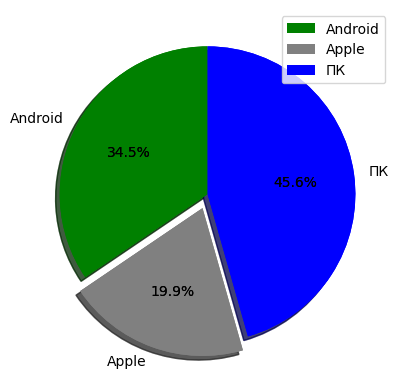

In [85]:
data_Blue = [df.query('Blue_android == 1')['HID'].count(),
             df.query('Blue_apple == 1')['HID'].count(),
             df.query('Blue_web == 1')['HID'].count()]

name = ['Android', 'Apple', 'ПК']

colors = ( "green", "gray", "blue") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 

ax1.pie(data_Blue, colors = colors, explode=explode, labels=name,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(data_Blue, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, name, loc="best")
plt.show()

Как мы видим у компании Blue больше всего скачивают приложение на __ПК__

### Компания Black

Количество уникальных пользователей

In [101]:
people_Black = df[df['has_Black_id'] != 0]['HID'].count()
people_Black

1076

Количество пользователей, у которых есть аккаунт только в этой компании

In [102]:
u_people_Black = df.query('has_Blue_id == 0 and has_Black_id != 0 and has_Green_id == 0')['HID'].count()
u_people_Black

707

Рассчитаем в процентном соотношении

In [103]:
print(round(u_people_Black / people_Black * 100, 2), '%')

65.71 %


Тоже неплохо. Больше половины пользователи только компании Black.

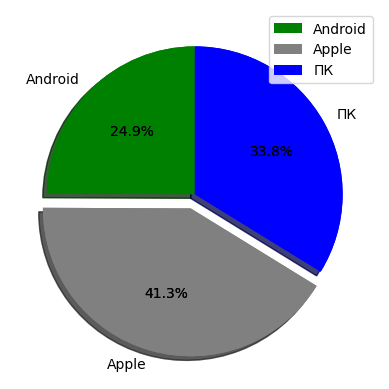

In [89]:
data_Black = [df.query('Black_android == 1')['HID'].count(),
             df.query('Black_apple == 1')['HID'].count(),
             df.query('Black_web == 1')['HID'].count()]

name = ['Android', 'Apple', 'ПК']

colors = ( "green", "gray", "blue") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 

ax1.pie(data_Black, colors = colors, explode=explode, labels=name,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(data_Black, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, name, loc="best")
plt.show()

Как мы видим у компании Black больше всего скачивают приложение на __Apple__

### Компания Green

Количество уникальных пользователей

In [104]:
people_Green = df[df['has_Green_id'] != 0]['HID'].count()
people_Green

882

Количество пользователей, у которых есть аккаунт только в этой компании

In [105]:
u_people_Green = df.query('has_Blue_id == 0 and has_Black_id == 0 and has_Green_id != 0')['HID'].count()
u_people_Green

625

Рассчитаем в процентном соотношении

In [106]:
print(round(u_people_Green / people_Green * 100, 2), '%')

70.86 %


Хороший процетаж. Но людей конечно маловато

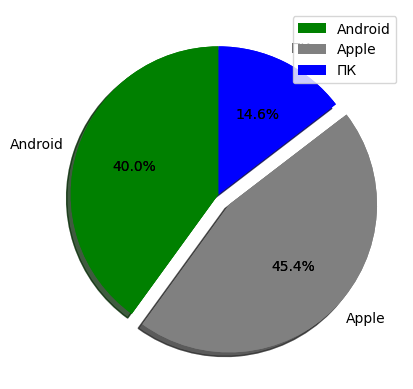

In [93]:
data_Green = [df.query('Green_android == 1')['HID'].count(),
             df.query('Green_apple == 1')['HID'].count(),
             df.query('Green_web == 1')['HID'].count()]

name = ['Android', 'Apple', 'ПК']

colors = ( "green", "gray", "blue") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 

ax1.pie(data_Green, colors = colors, explode=explode, labels=name,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(data_Green, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, name, loc="best")
plt.show()

Как мы видим у компании Green больше всего скачивают приложение на __Apple__

### Компания Red

Для компании Red я выведу только круговую диаграмму 

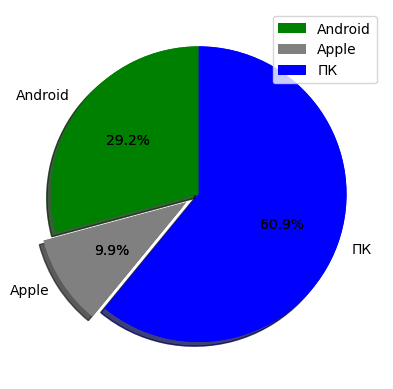

In [94]:
data_Red = [df.query('Red_android == 1')['HID'].count(),
             df.query('Red_apple == 1')['HID'].count(),
             df.query('Red_web == 1')['HID'].count()]

name = ['Android', 'Apple', 'ПК']

colors = ( "green", "gray", "blue") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 

ax1.pie(data_Red, colors = colors, explode=explode, labels=name,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(data_Red, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, name, loc="best")
plt.show()

Как мы видим у компании Red больше всего скачивают приложение на __ПК__

### Продолжение анализа

Посмотрим сколько суммарно скачиваний во всех компаниях на всех платформах

In [95]:
print('Количество скачиваний в компании Red -', sum(data_Red))
print('Количество скачиваний в компании Blue -', sum(data_Blue))
print('Количество скачиваний в компании Black -', sum(data_Black))
print('Количество скачиваний в компании Green -', sum(data_Green))

Количество скачиваний в компании Red - 110093
Количество скачиваний в компании Blue - 23317
Количество скачиваний в компании Black - 4316
Количество скачиваний в компании Green - 1357


Посмотрим сколько клиентов компаний из Москвы

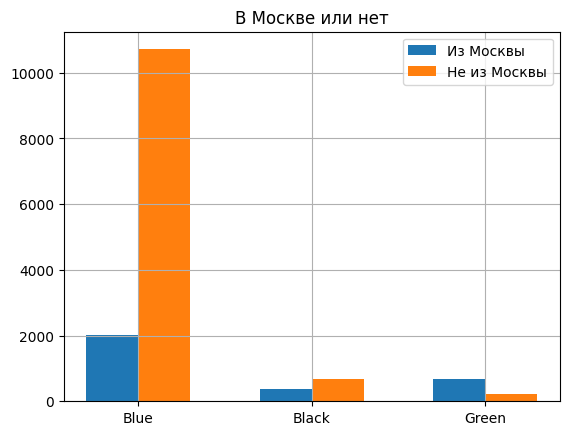

In [132]:
is_Moscow = [df.query('is_msk == 1 and has_Blue_id==1')['HID'].count(),
             df.query('is_msk == 1 and has_Black_id==1')['HID'].count(),
             df.query('is_msk == 1 and has_Green_id==1')['HID'].count()]

not_is_Moscow = [df.query('is_msk == 0 and has_Blue_id==1')['HID'].count(),
                 df.query('is_msk == 0 and has_Black_id==1')['HID'].count(),
                 df.query('is_msk == 0 and has_Green_id==1')['HID'].count()]

par = ['Blue', 'Black', 'Green']
width = 0.3
x = np.arange(len(par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, is_Moscow, width, label='Из Москвы')
rects2 = ax.bar(x + width/2, not_is_Moscow, width, label='Не из Москвы')
ax.set_title('В Москве или нет')
ax.set_xticks(x)
ax.set_xticklabels(par)
ax.grid()
ax.legend();

На этом анализ закончен переходим к выводам

## Выводы

__Общие выводы__

1) Если раставлять компании по количеству скачиваний, то компания Red явно популярнее своих конкурентов. На втором месте по популяроности скачивания является компания Blue. Самая не популярная компания Green.

2) У компании Blue самые преданные покупатели. 96.88 % людей зарегистрированы только в этой компании. 

3) У нас практически нет данных про компанию Red

__Предложения__

1) Компании Blue и Red нужно сделать упор на ПК аудиторию, так как она у них преобладает. В свою очередь компании Black и Green нужно сделать упор на пользователей Apple.

2) Большенство клиентов компании Blue из Москвы. Они могли бы провести в других городах какие-нибудь мероприятия для привлечения новых пользователей